# Regression simple

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [23]:
#importing the dataset
df= pd.read_csv('./reg_simple.csv', sep=",")
df

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21
5,7,25
6,8,30
7,9,21
8,10,32
9,11,34


In [24]:
#Récuprer X et Y à partir du jeu de données
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
print(X)
print(y)


[[ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [29]
 [30]]
[10 12 20 22 21 25 30 21 32 34 35 30 50 45 55 60 66 64 67 72 74 80 79 84
 93 98 99]


In [25]:
#Fractionnement le jeu de données en jeu d'entraînement et jeu de test (20% pour le test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)

In [26]:
#modèle LinearRegression et entraînez le sur les données d'entraînement
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

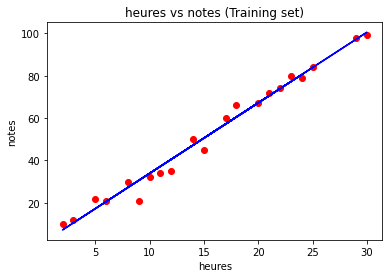

In [28]:
#Visualisation des résultats du modèle sur les données d'entraînement
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('heures vs notes (Training set)')
plt.xlabel('heures')
plt.ylabel('notes')
plt.show()

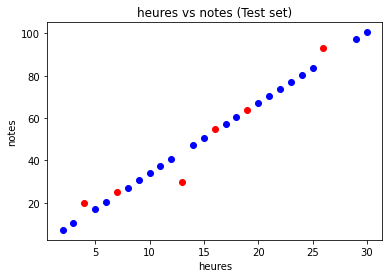

In [29]:
#Visualisation des résultats du modèle sur les données de test
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_train, regressor.predict(X_train), color = 'blue')
plt.title('heures vs notes (Test set)')
plt.xlabel('heures')
plt.ylabel('notes')
plt.show()

In [30]:
# Evaluation du modèle par le mean_squared_error et mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(mse)
print(mae)

44.37111207555747
4.705161854768154


In [ ]:
plus le mse est proche de 0 mieux c'est 

In [31]:
regressor.score(X_test, y_test)

0.9328868520347855

In [ ]:
le score correspond à R2, le coeff de détermination . Il est preformant à 93% (93% seront bonnes)

# Régression Linéaire Multiple

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [33]:
boston = pd.read_csv('./boston_house_prices.csv', sep=",")

In [12]:
#Récuprer X et Y à partir du jeu de données
X = boston .iloc[:, :-1].values
y = boston .iloc[:, 13].values
y= y.reshape(506,1)
print(X.shape)
print(y.shape)

(506, 13)
(506, 1)


In [5]:
#Fractionnement du jeu de données en jeu d'entraînement et jeu de test (20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
#LA MACHINE VA FAIRE DES TESTS PLUS PETITs l'apprentissagesur 80% de 506 et va séparer 3 ecahntillons

In [6]:
#Standariser les variables d'entrainement et de test
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)

In [7]:
#Créer votre modèle LinearRegression multiple et entraînez le sur les données d'entraînement
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predire les résultats du modèle sur l'ensemble du test
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

<IPython.core.display.Javascript object>


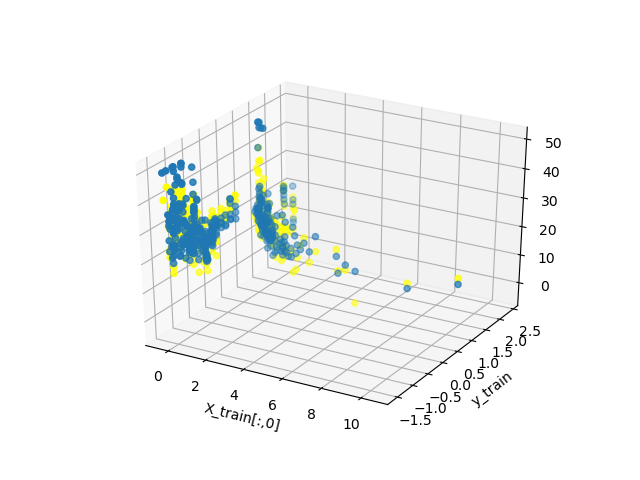

In [13]:
#Visualisation des résultats du modèle sur les données d'entraînement en 3D avec l
%matplotlib notebook
fig= plt.figure()
ax=fig.add_subplot(111,projection='3d')
plt.xlabel("X_train[:,0]")
plt.ylabel("y_train")
ax.scatter(X_train[:,0],X_train[:,2],y_train)
ax.scatter(X_train[:,0],X_train[:,2],y_pred_train,color = 'yellow')

<IPython.core.display.Javascript object>


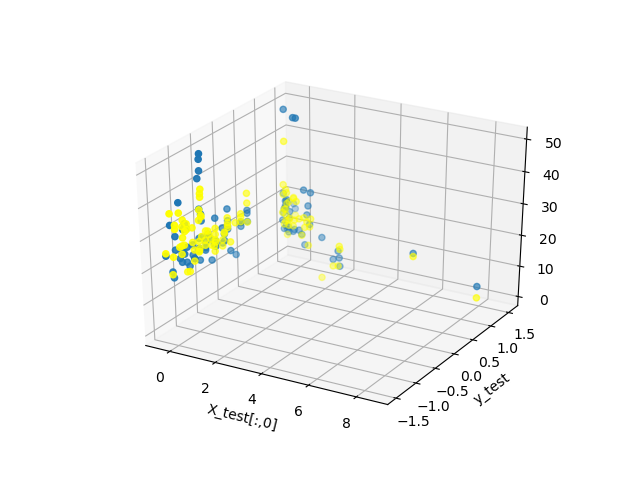

In [10]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig= plt.figure()
ax=fig.add_subplot(111,projection='3d')
plt.xlabel("X_test[:,0]")
plt.ylabel("y_test")
ax.scatter(X_test[:,0],X_test[:,2],y_test)
ax.scatter(X_test[:,0],X_test[:,2],y_pred_test,color = 'yellow')

In [11]:
#Evalution du modèle par le mean_squared_error

mse2 = mean_squared_error(y_test, y_pred_test)
print(mse2)


33.44897999767648


In [36]:
regressor.score(X, y)

0.9733112140083816